# COMP 7150 Assignment 3
Due date: 03/25/2024, before midnight

**YOUR NAME**: Hasan Mashrique(U00706395)

----

In [213]:
import pandas, seaborn
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler,StandardScaler
%matplotlib inline

In [214]:
import warnings
warnings.filterwarnings('ignore')

In [215]:
df = pandas.read_csv('../Datasets/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


---
## **Problem 1**

Create a KMeans model (use random state of 2024) based on Age, Annual Income, and Spending Score.  Rescale the features appropriately.

Visualize the number of clusters (k) versus inertia, and visually identify the elbow.


## Solution 1:

Lets build the KMeans model with initial no_cluster=4. But first, lets convert and scale the data.

In [216]:
df = pandas.get_dummies(df, drop_first=True)

df.sample(3)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
127,128,40,71,95,1
135,136,29,73,88,0
59,60,53,46,46,1


In [217]:
standard_scaled_data = pandas.DataFrame(StandardScaler().fit_transform(df),
                                       columns= df.columns)

min_max_scaled_data = pandas.DataFrame(MinMaxScaler().fit_transform(df),
                                       columns= df.columns)


In [218]:
min_max_scaled_data.sample(3)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
87,0.437186,0.076923,0.344262,0.551020,0.0
52,0.261307,0.250000,0.229508,0.540816,0.0
20,0.100503,0.326923,0.073770,0.346939,1.0


In [219]:
features= min_max_scaled_data[['Age','Annual Income (k$)','Spending Score (1-100)']]


In [220]:
#features= df[['Age','Annual Income (k$)','Spending Score (1-100)']]

model= KMeans(n_clusters=4, random_state=2024)

model.fit(features)

KMeans(n_clusters=4, random_state=2024)

In [221]:
min_max_scaled_data['cluster']= model.labels_

In [222]:
min_max_scaled_data.sample(3)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,cluster
7,0.035176,0.096154,0.024590,0.948980,0.0,0
93,0.467337,0.423077,0.368852,0.397959,0.0,1
45,0.226131,0.115385,0.196721,0.653061,0.0,0


Lets visualize the clustering using a relplot.

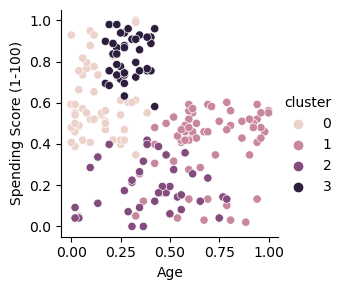

In [223]:

seaborn.relplot(data=min_max_scaled_data, 
                x='Age', 
                y='Spending Score (1-100)', 
                kind= 'scatter',
                hue= 'cluster', 
                height=3)

From the clustering using 4 clusters, its not easy to identify the unique clusters. In such cases, we need to find the elbow value to find the appropriate cluster value.



In [224]:
min_max_scaled_data.sample(3)


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,cluster
115,0.577889,0.019231,0.409836,0.500000,0.0,0
194,0.974874,0.557692,0.860656,0.153061,0.0,2
107,0.537688,0.692308,0.393443,0.459184,1.0,1


In [225]:
inertia=[]
cluster=[]
    
for i in range(2,15):
    model=KMeans(n_clusters=i, random_state=2024)
    model.fit(features)
    
    cluster.append(i)
    inertia.append(model.inertia_)

    #print("clusters:",i ,"Inertia:", model.inertia_)

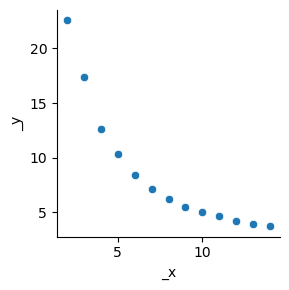

In [226]:
seaborn.relplot(x=cluster, y=inertia, height= 3)

#### From the relplot, we can say cluster value 6 looks to be appropriate cluster since the inertia is more consistent from cluster 6.

---
**Problem 2**

Build a model based on the value of k at the elbow.  Are older people more frugal than younger people?

Explain what you think being "frugal" means in this context.  And explain your answer.  It's not a simple "Yes" or "No".

## Solution 2:



Lets build the model first according to the elbow value gained from 1.

In [227]:
model= KMeans(n_clusters=6, random_state=2024)

model.fit(features)



KMeans(n_clusters=6, random_state=2024)

In [228]:
min_max_scaled_data['cluster']= model.labels_

In [229]:
min_max_scaled_data.sample(3)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,cluster
63,0.316583,0.692308,0.262295,0.591837,0.0,3
146,0.733668,0.576923,0.508197,0.357143,1.0,0
13,0.065327,0.115385,0.040984,0.775510,0.0,4


Lets look at the mean age of people in the clusters. 

In [230]:
## finding the mean age to define the age group of the clusters

age_groups= min_max_scaled_data.groupby("cluster")[['Age']].mean()
age_groups.sort_values("Age")

,Age
cluster,
4,0.144649
1,0.149374
2,0.286058
0,0.500000
5,0.569838
3,0.737179


Looking at the mean age of people, we can define the young and older people based on the logic below.

- older people > .30
- young people < .30
- cluster: `0` `3` `5`: older  and  cluster: `1` `2` `4`: young 



Lets look at the relplot of the clusters based on `Annual Income` and `Spending Score`.

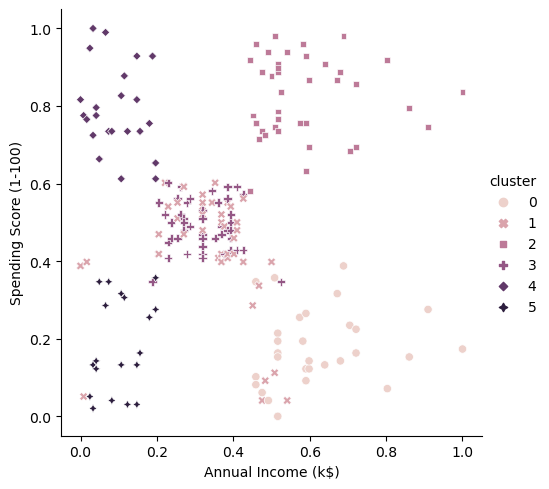

In [231]:
seaborn.relplot(data=min_max_scaled_data, 
                x='Annual Income (k$)', 
                y='Spending Score (1-100)', 
                kind= 'scatter',
                style='cluster',
                hue= 'cluster', 
                height=5)

First, lets define what frugal means in our context.

**Frugal:**
"
The term "frugal" describes someone who is careful with money and resources, often characterized by avoiding unnecessary expenses and being economical in their spending habits. It involves making deliberate choices to spend money wisely, seeking value for money, and avoiding wastefulness. A frugal person tends to prioritize saving money and making efficient use of what they have rather than indulging in luxury or extravagance." [source: chatGPT]

Looking at the clusters for younger and older people,
older people can be said to be frugal with their spending. Even if their income increases, their spending tend 
to be within or even below their abilities (cluster 0,3 and 5).

For younger, the trend is quite different. They seem to spend a lot more than older people of similar income range (cluster 0 and 2). Even if their income is not much, they spend a lot which is comparable to high incoming youngters (cluster 4 and cluster 2).

---

**Problem 3**

Do older people tend to live within their means and younger people don't?

Explain your answer.  It's not a simple "Yes" or "No".

For this problem, first, lets define `living within their means`:
- "Live within the means" is an idiomatic expression that means to live or spend money in a way that is sustainable and does not exceed one's income or resources. It implies living within one's financial limits and not indulging in excessive spending or debt." [source: ChatGPT]    

In [232]:
aggdata=min_max_scaled_data.groupby('cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean().round(2)

aggdata

#aggdata['group']= aggdata['Age'].apply(lambda data: 'Younger' if data<40 else 'Older')

,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,
0,0.50,0.62,0.17
1,0.15,0.33,0.43
2,0.29,0.58,0.82
3,0.74,0.32,0.49
4,0.14,0.09,0.79
5,0.57,0.10,0.18


In [233]:
Age_sort= aggdata.sort_values("Age")
Age_sort

,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,
4,0.14,0.09,0.79
1,0.15,0.33,0.43
2,0.29,0.58,0.82
0,0.50,0.62,0.17
5,0.57,0.10,0.18
3,0.74,0.32,0.49


After sorting by `Age`,  we can say that older people are above mean age of .50 and younger people are below .30. So, cluster 1,2 and 4 are the clusters for younger people and cluster 0,3 and 5 are older people.
Lets plot a relplot to observe their spending pattern according to `annual income`.

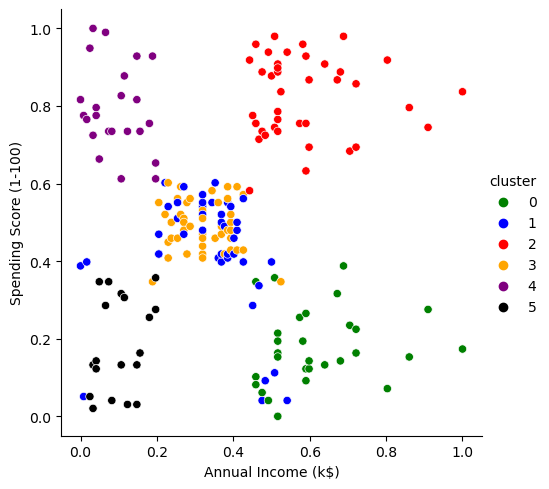

In [234]:
custom_palette = ["green", "blue", "red","orange","purple","black"]
seaborn.relplot(data=min_max_scaled_data, 
                x='Annual Income (k$)', 
                y='Spending Score (1-100)', 
                kind= 'scatter',
                #style='cluster',
                palette=custom_palette,
                hue= 'cluster', 
                height=5)

From the relplot, we can see younger people have a much higher spending score compared to older people. For cluster 4 (younger), their expenditure is a lot higher even though they have minimal income. If we compare it with older people of similar income(cluster 5), we can see their expenditure is very minimal because of their low income. If we compare the high earning younger and older people(cluster 0 and 2), we see that older people spend a lot less than similar high earning young people.

From this analysis, we can conclude that older people always tend to live well within their means but its not exactly same for younger people. A group of young people still spend a lot more even though they have low income(cluster 4).

---
## **Problem 4**

What is the extend to which younger and older people live beyond their means? 

## Solution 4:
For this problem, lets divide the younger and older people data according to the clusters defined before. Then we look at their spending behavior according to `annual income` in relplot.

In [235]:
aggdata.sort_values("Age")

,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,
4,0.14,0.09,0.79
1,0.15,0.33,0.43
2,0.29,0.58,0.82
0,0.50,0.62,0.17
5,0.57,0.10,0.18
3,0.74,0.32,0.49


In [236]:
young_ppl= min_max_scaled_data[min_max_scaled_data['cluster'].isin([1,2,4])]
young_ppl.sample(5)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,cluster
137,0.688442,0.269231,0.475410,0.734694,1.0,2
112,0.562814,0.384615,0.401639,0.418367,0.0,1
151,0.758794,0.403846,0.516393,0.887755,1.0,2
113,0.567839,0.019231,0.401639,0.459184,1.0,1
23,0.115578,0.250000,0.081967,0.734694,1.0,4


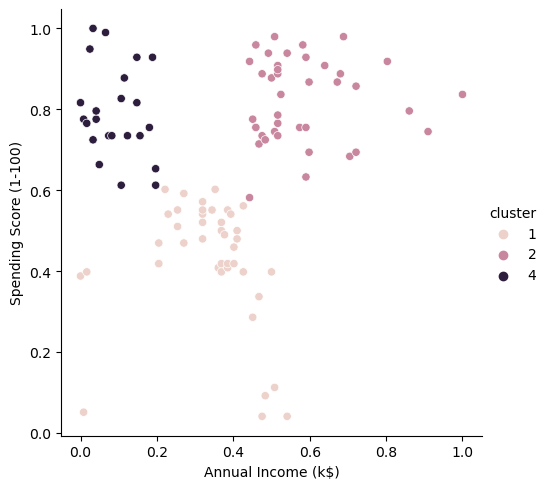

In [237]:
seaborn.relplot(data=young_ppl, x= 'Annual Income (k$)', y='Spending Score (1-100)', hue='cluster')

From the relplot, we can see the relationship between `Annual Income` and `Spending Score` in younger people.
Here, we see some young people tend to spend a lot even with a low annual income(spending score reaching almost 1).With an increasing income, their spending score tend to be more in accordance with their income, meaning their spending score also increases with their increased income(linear increament).  

So, we can say, younger people can go beyond their means sometimes though its not true for everyone.

In [238]:
older_ppl= min_max_scaled_data[min_max_scaled_data['cluster'].isin([0,3,5])]

In [239]:
older_ppl.sample(5)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,cluster
74,0.371859,0.788462,0.319672,0.469388,1.0,3
57,0.286432,0.980769,0.237705,0.459184,1.0,3
71,0.356784,0.557692,0.278689,0.418367,0.0,3
64,0.321608,0.865385,0.270492,0.510204,1.0,3
186,0.934673,0.692308,0.704918,0.234694,0.0,0


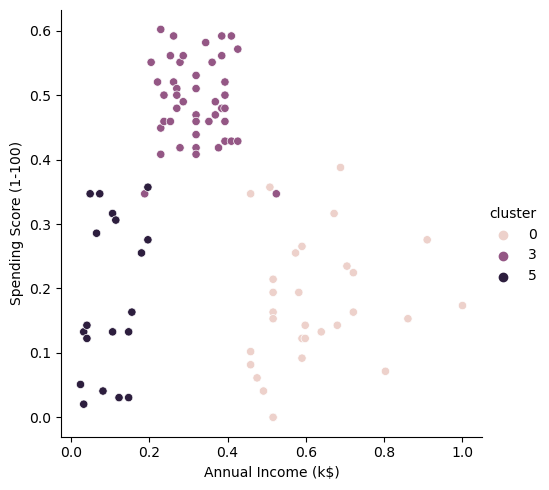

In [240]:
seaborn.relplot(data=older_ppl, x= 'Annual Income (k$)', y='Spending Score (1-100)', hue='cluster')

For older people, their spending is more consistent with their income. The plot indicates their speding score doesnt go beyond .60 irrespective of their income. The highest spending older people have annual income around .4K and their spending score is around .60. Interestingly, the higest earning older people tend to spend a lot less(spending score <= .40).

Finally, we can conclude that older people dont go beyond their means and dont spend on unnecessary expenses.

---
## **Problem 5**

Is there any characteristic that is unique to male or female?

## Solution 5:

From this problem, thats look at the `mean` `annual income` and `spending score` of male and female in each of the cluster.

In [241]:
malefemale= min_max_scaled_data.groupby(['cluster', 'Gender_Male'])[['Annual Income (k$)','Spending Score (1-100)']].mean()

malefemale
#malefemale.sort_values("Gender_Male")

Annual Income (k$)  Spending Score (1-100)
cluster Gender_Male                                            
0       0.0                    0.641686                0.200437
        1.0                    0.593238                0.148597
1       0.0                    0.322623                0.440816
        1.0                    0.350182                0.420635
2       0.0                    0.576006                0.812152
        1.0                    0.591075                0.833333
3       0.0                    0.321564                0.489403
        1.0                    0.322261                0.491944
4       0.0                    0.095433                0.797376
        1.0                    0.088342                0.782313
5       0.0                    0.109538                0.196660
        1.0                    0.089139                0.165816

- In this data, cluster
    
    -`0` `3` `5`: older people  
    -`1` `2` `4`: young people
- `0`: Female , `1`: Male
    
If we look at the data of both male and female, their `annual income` and `spending` follow a similar trend. Irrespective of their gender, their income and spending pattern is similar. Both male and female in same cluster show similar characteristics in terms of income and spending, their gender has no impact on it.    

In [242]:
min_max_scaled_data.groupby(['Gender_Male'])[['Annual Income (k$)','Spending Score (1-100)']].mean()


,Annual Income (k$),Spending Score (1-100)
Gender_Male,,
0.0,0.362705,0.515579
1.0,0.387109,0.484810


Lets look at the relplot of male female expenditure based on income. 

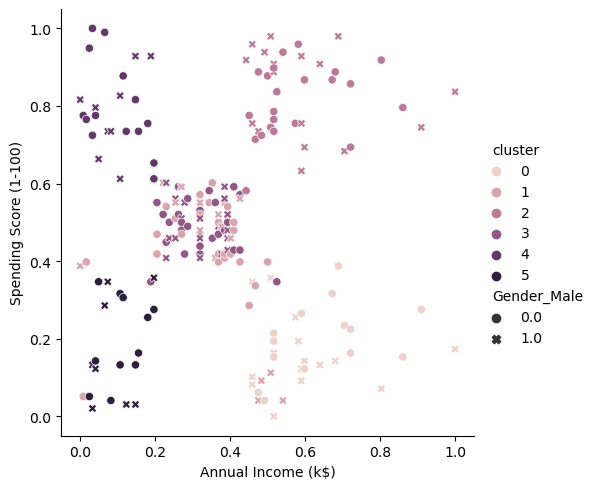

In [243]:
seaborn.relplot(data=min_max_scaled_data, 
                x='Annual Income (k$)', 
                y='Spending Score (1-100)', 
                kind= 'scatter',
                style='Gender_Male',
                hue= 'cluster', 
                height=5)


Looking at the relplot of both male female expenditure, we can see similar patterns. Even in each cluster, the pattern is quite similar. Its very difficult to distinguish expenditure pattern of people based on their gender.

We can say that there are no unique characteristics based on the gender(male and female).